# QAP
http://anjos.mgi.polymtl.ca/qaplib/inst.html#Ta

In [1]:
from emplacement import Emplacement
from equipment import Equipment
from solution import Solution
from utils import extract, obj_simple, obj_simple_2, v_permute_one, recuit, tabou, brute_force, descente, get_best_voisin
from time import perf_counter 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

path = "data/tai12a.dat"

In [2]:
emplacements, equipments = extract(path)
s = Solution(emplacements, equipments) # init random
print("Fitness initiale :", obj_simple(s))

Fitness initiale : 317564


In [3]:
max_time=10

In [4]:
def print_graph(nb_steps, value_at_steps, min_at_steps):
    gap = nb_steps/len(value_at_steps)
    axis = [i*gap for i in range(len(value_at_steps))]

    plt.plot(axis, value_at_steps, 'b')
    plt.plot(axis, min_at_steps, 'r')
    plt.ylabel('Fitness')
    plt.xlabel('Step')
    plt.show()

### Recuit simulé :

nb_steps= 121850
Fitness recuit : 236006


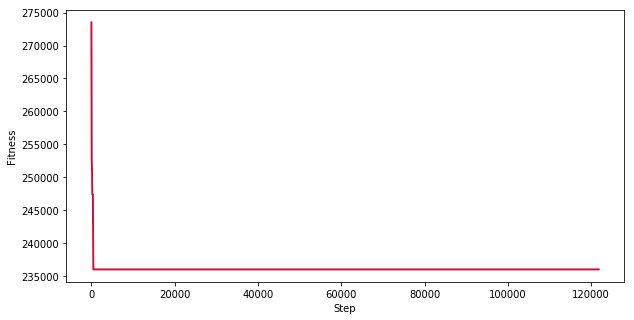

In [18]:
s_recuit, f_min, nb_steps, value_at_steps, min_at_steps = recuit(
    f_voisin=v_permute_one,
    f_obj=obj_simple_2, 
    s=s, 
    t=5, 
    n=50, 
    mu=0.7,
    max_time=max_time,
    return_stats=True)
print("Fitness recuit :", obj_simple_2(s_recuit))
print_graph(nb_steps, value_at_steps, min_at_steps)

### Méthode tabou :

Fitness tabou : 224416


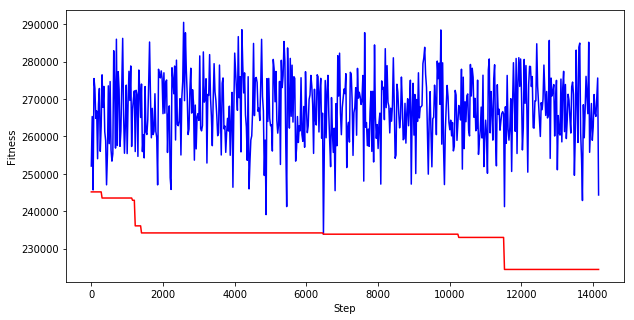

In [19]:
s_tabou, f_min, nb_steps, value_at_steps, min_at_steps = tabou(f_voisin=get_best_voisin,
                f_obj=obj_simple_2,
                s=s,
                list_size=50,
                max_time=max_time,
                return_stats=True)
print("Fitness tabou :", obj_simple_2(s_tabou))
print_graph(nb_steps, value_at_steps, min_at_steps)

### Descente

nb_step= 3950
nb_restart= 545
Fitness descente: 224416


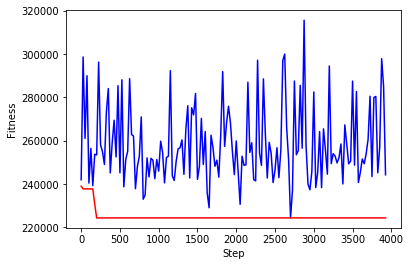

In [5]:
s_d, f_min, nb_steps, value_at_steps, min_at_steps = descente(obj_simple_2,
                                                              s, 
                                                              max_time=max_time,
                                                              return_stats=True)
print("Fitness descente:", f_min)
print_graph(nb_steps, value_at_steps, min_at_steps)

### Brute Force

Fitness Brute Force: 246156


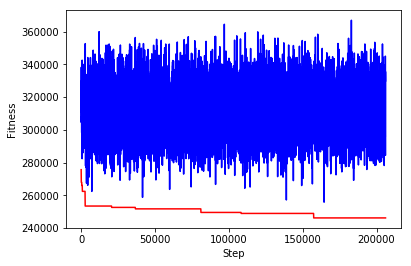

In [5]:
s_brute_force, f_min, nb_steps, value_at_steps, min_at_steps = brute_force(obj_simple_2, s, max_time, return_stats=True)
print("Fitness Brute Force:", f_min)
print_graph(nb_steps, value_at_steps, min_at_steps)

### Solution optimale

In [ ]:
s_optimale = Solution(emplacements, equipments, [8,1,6,2,11,10,3,5,9,7,12,4])
print("Fitness opt :", obj_simple(s_optimale))

# Tests

In [ ]:
start = perf_counter()
print(obj_simple(s))
end = perf_counter()
print((end - start))

start = perf_counter()
print(obj_simple_2(s))
end = perf_counter()
print((end - start))

In [ ]:
s2 = s
s = s.copy()

In [ ]:
hex(id(s2.emplacements))

In [ ]:
hex(id(s.emplacements))

In [ ]:
hex(id(s2.x))

In [ ]:
hex(id(s.x))